In [1]:
import numpy as np
ytest = np.load('../results/ytest.npy')

In [2]:
def accuracy(folder = 'norm'):
    res = []
    for i in range(10):
        vote = np.load('../results/%s/RF_rand%d_yhat.npy'%(folder,i))    
        res.append(vote)
        #vote = np.load('../results/%s/mlp_rand%d_yhat.npy'%(folder,i))
        #res.append(vote)
    res = np.array(res).T

    yhat = []
    for vote in res:
        best = 0
        num = 0
        for j in range(19):
            vj = len(vote[vote == j])
            if vj > num:
                best = j
                num = vj
        yhat.append(best)
    yhat = np.array(yhat)

    return 1 - (len(yhat[yhat != ytest])/len(ytest)),yhat

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
def plotconfusion(y_act,y_pre,tit = '', fn = ''):
    cm = confusion_matrix(y_act, y_pre)
    plt.figure(figsize = (10,8),dpi = 80)
    sns.set_theme()
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.title(tit)
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.savefig('../figures/%s'%fn)


0.45554997488699145

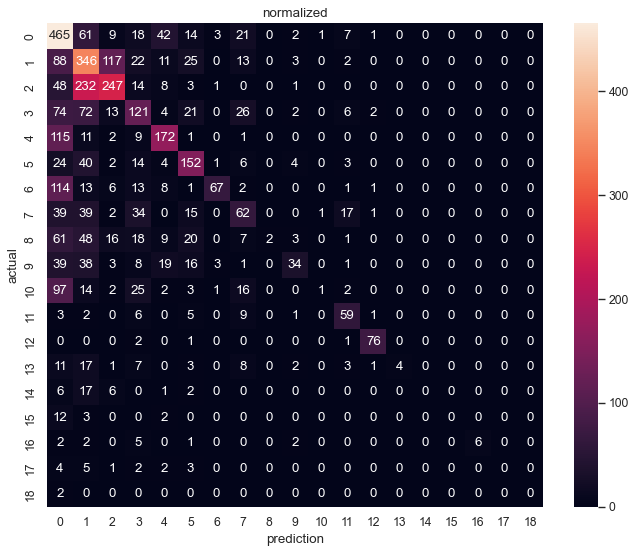

In [5]:
acc,yhat_norm = accuracy() 
plotconfusion(ytest, yhat_norm, tit = 'normalized', fn = 'RF_norm')
acc

0.4588146659969864

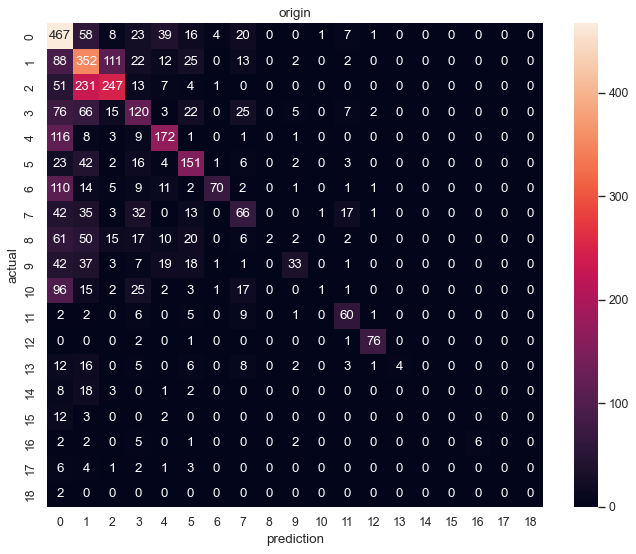

In [6]:
acc, yhat_origin = accuracy('origin')
plotconfusion(ytest, yhat_origin, tit = 'origin', fn = 'RF_origin')
acc

0.467101958814666

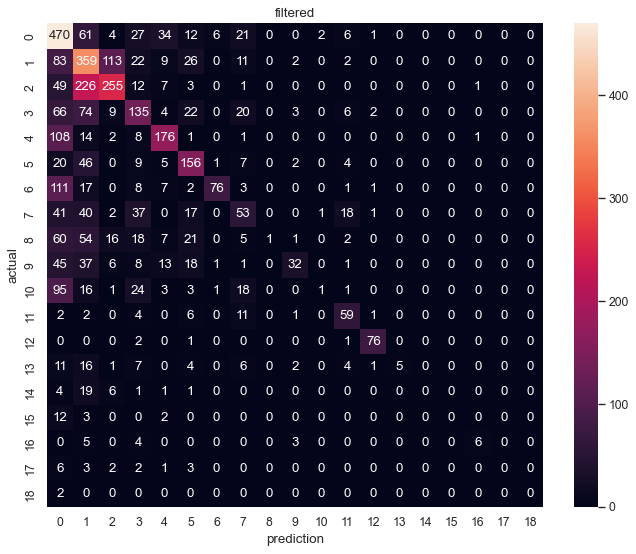

In [7]:
acc, yhat_filter = accuracy('norm_filter')
plotconfusion(ytest, yhat_filter, tit = 'filtered', fn = 'RF_filter')
acc

In [8]:
def loadresk(folder = 'norm'):
    res = np.load('../results/keras_%s/yhat.npy'%folder)
    y = np.argmax(res, axis=1).flatten()
    f = open('../results/keras_%s/acc.txt'%folder)
    acc = f.read().strip()
    acc = float(acc)
    return acc,y

0.4591

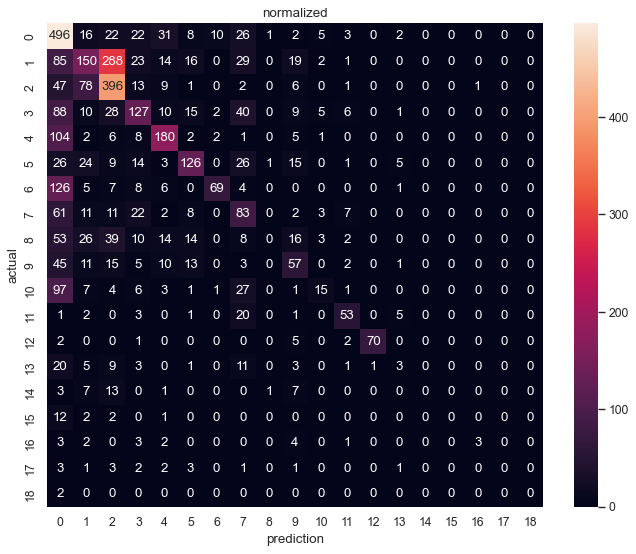

In [9]:
acc,kyhat_norm = loadresk() 
plotconfusion(ytest, kyhat_norm, tit = 'normalized', fn= 'keras_norm')
acc

0.4761

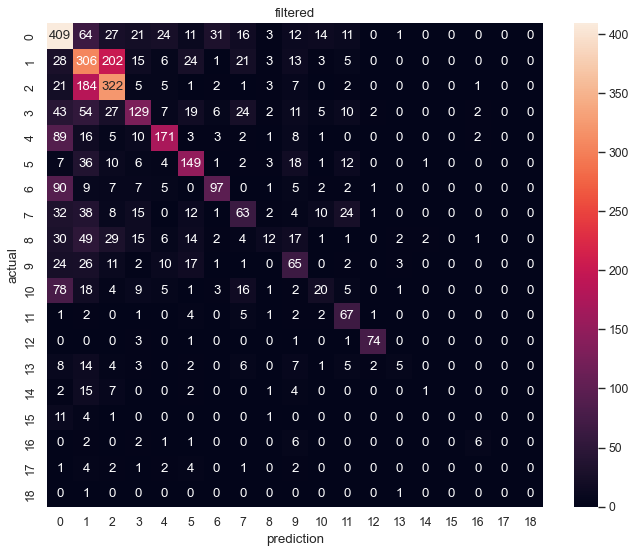

In [10]:
acc, kyhat_filter = loadresk('filter')
plotconfusion(ytest, kyhat_filter, tit = 'filtered', fn = 'keras_filter')
acc

0.3787

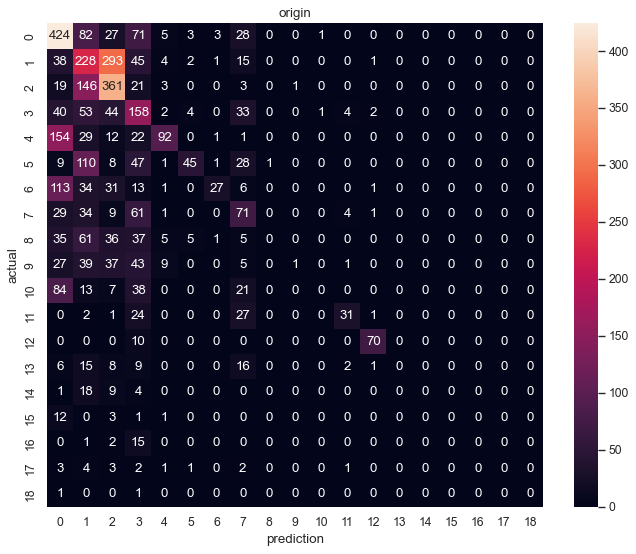

In [11]:
acc, kyhat_origin = loadresk('origin')
plotconfusion(ytest, kyhat_origin, tit = 'origin', fn = 'keras_origin')
acc

In [12]:
from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

|  | 0| 1|
|--|--|--|
|0 |TN|FP|
|1 |FN|TP|

In [13]:
def multicm(y_act,y_pred):
    cms = multilabel_confusion_matrix(y_act, y_pred)
    return cms

def analysis(cm):
    res = {}
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    res['acc'] = (TN+TP)/(TN+TP+FN+FP)
    res['F1'] = 2*TP/(2*TP+FP+FN) if TP != 0 else 0.0
    res['precision'] = TP/(TP+FP) if TP != 0 else 0.0
    res['recall'] = TP/(TP+FN) if TP != 0 else 0.0
    
    return res

def fullmetric(y_act,y_pred):
    cm_norm = multicm(y_act,y_pred)
    M = np.zeros((19,4))
    for i in range(19):
        ana = analysis(cm_norm[i])
        M[i,0] = ana['acc']
        M[i,1] = ana['F1']    
        M[i,2] = ana['precision']    
        M[i,3] = ana['recall'] 
    return M

In [14]:
metricesheaders = ['ACC','F1', 'Precision', 'Recall']
modeltype = ['RF_origin','RF_norm','RF_filter','CNN_origin','CNN_norm','CNN_filter']


header = pd.MultiIndex.from_product([modeltype,metricesheaders], names=['model_data','metrices'])

metric = fullmetric(ytest,yhat_origin)
metric = np.concatenate((metric,fullmetric(ytest,yhat_norm)),axis=1)
metric = np.concatenate((metric,fullmetric(ytest,yhat_filter)),axis=1)
metric = np.concatenate((metric,fullmetric(ytest,kyhat_origin)),axis=1)
metric = np.concatenate((metric,fullmetric(ytest,kyhat_norm)),axis=1)
metric = np.concatenate((metric,fullmetric(ytest,kyhat_filter)),axis=1)

dM = pd.DataFrame(metric,columns = header)
dM.to_csv('../results/analysis.csv', index= False)
dM

model_data RF_origin                                 RF_norm            \
metrices         ACC        F1 Precision    Recall       ACC        F1   
0           0.767454  0.502151  0.384046  0.725155  0.769463  0.503247   
1           0.780010  0.445570  0.369360  0.561404  0.775239  0.436043   
2           0.879960  0.508230  0.590909  0.445848  0.877700  0.503568   
3           0.896032  0.366972  0.383387  0.351906  0.895279  0.367223   
4           0.937217  0.579125  0.607774  0.553055  0.936966  0.578151   
5           0.939478  0.556169  0.515358  0.604000  0.941738  0.567164   
6           0.958815  0.460526  0.897436  0.309735  0.957810  0.443709   
7           0.936715  0.343750  0.379310  0.314286  0.935208  0.324607   
8           0.954043  0.021390  1.000000  0.010811  0.954043  0.021390   
9           0.963084  0.309859  0.647059  0.203704  0.962833  0.314815   
10          0.958815  0.012048  0.333333  0.006135  0.958815  0.012048   
11          0.982170  0.628272  0.571429  0.697674  0.982170  0.624339   
12          0.997238  0.932515  0.915663  0.950000  0.997238  0.932515   
13          0.986690  0.131148  1.000000  0.070175  0.986690  0.131148   
14          0.991964  0.000000  0.000000  0.000000  0.991964  0.000000   
15          0.995731  0.000000  0.000000  0.000000  0.995731  0.000000   
16          0.996986  0.500000  1.000000  0.333333  0.996986  0.500000   
17          0.995731  0.000000  0.000000  0.000000  0.995731  0.000000   
18          0.999498  0.000000  0.000000  0.000000  0.999498  0.000000   

model_data                     RF_filter            ... CNN_origin            \
metrices   Precision    Recall       ACC        F1  ...  Precision    Recall   
0           0.386213  0.722050  0.776745  0.513942  ...   0.426131  0.658385   
1           0.360417  0.551834  0.773732  0.443484  ...   0.262371  0.363636   
2           0.578454  0.445848  0.884229  0.525232  ...   0.405163  0.651625   
3           0.380503  0.354839  0.899799  0.403587  ...   0.254019  0.463343   
4           0.605634  0.553055  0.942742  0.606897  ...   0.736000  0.295820   
5           0.531469  0.608000  0.941236  0.571429  ...   0.750000  0.180000   
6           0.881579  0.296460  0.960070  0.488746  ...   0.794118  0.119469   
7           0.360465  0.295238  0.934204  0.288043  ...   0.272031  0.338095   
8           1.000000  0.010811  0.953792  0.010753  ...   0.000000  0.000000   
9           0.629630  0.209877  0.963837  0.307692  ...   0.500000  0.006173   
10          0.333333  0.006135  0.958564  0.011976  ...   0.000000  0.000000   
11          0.572816  0.686047  0.981668  0.617801  ...   0.720930  0.360465   
12          0.915663  0.950000  0.997238  0.932515  ...   0.909091  0.875000   
13          1.000000  0.070175  0.986941  0.161290  ...   0.000000  0.000000   
14          0.000000  0.000000  0.991964  0.000000  ...   0.000000  0.000000   
15          0.000000  0.000000  0.995731  0.000000  ...   0.000000  0.000000   
16          1.000000  0.333333  0.996484  0.461538  ...   0.000000  0.000000   
17          0.000000  0.000000  0.995731  0.000000  ...   0.000000  0.000000   
18          0.000000  0.000000  0.999498  0.000000  ...   0.000000  0.000000   

model_data  CNN_norm                               CNN_filter            \
metrices         ACC        F1 Precision    Recall        ACC        F1   
0           0.767454  0.517205  0.389325  0.770186   0.824209  0.538867   
1           0.827725  0.304260  0.417827  0.239234   0.784782  0.416610   
2           0.845806  0.563300  0.464789  0.714801   0.855349  0.527869   
3           0.910347  0.415712  0.470370  0.372434   0.917880  0.441026   
4           0.939980  0.601002  0.625000  0.578778   0.946007  0.614004   
5           0.948016  0.549020  0.602871  0.504000   0.945505  0.578641   
6           0.956806  0.445161  0.821429  0.305310   0.954797  0.518717   
7           0.918383  0.338086  0.295374  0.395238   0.938222  0.338710   
8           0.

In [15]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

def computeMetrices(folder, y_act,y_pred = None):
    auc= np.nan
    if y_pred is None:
        folder = folder
        y_pred = np.load('../results/keras_%s/yhat.npy'%folder)
        auc = roc_auc_score(y_act, y_pred, multi_class = 'ovr', average = 'macro')
        y_pred = np.argmax(y_pred, axis=1).flatten()
    acc = accuracy_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred, average = 'macro')
    rec = recall_score(y_act, y_pred, average = 'macro')
    prec = precision_score(y_act, y_pred, average = 'macro')
    return [acc,f1,rec,prec,auc]

In [16]:
summary = []
summary.append(computeMetrices('origin',ytest))
summary.append(computeMetrices('norm',ytest))
summary.append(computeMetrices('filter',ytest))
summary.append(computeMetrices('origin',ytest,yhat_origin))
summary.append(computeMetrices('norm',ytest,yhat_norm))
summary.append(computeMetrices('filter',ytest,yhat_filter))
summary = np.array(summary)

sh = ['accuracy','f1_score','recall', 'precision', 'AUC']
ih = ['CNN_origin', 'CNN_norm', 'CNN_filter', 'RF_origin', 'RF_norm', 'RF_filter']

dS = pd.DataFrame(summary, columns = sh, index = ih)
dS.to_csv('../results/summary.csv', index= False)
dS

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

,accuracy,f1_score,recall,precision,AUC
CNN_origin,0.378704,0.224003,0.226948,0.317361,0.831079
CNN_norm,0.459066,0.324289,0.317602,0.392044,0.861626
CNN_filter,0.476143,0.354311,0.352783,0.404671,0.870714
RF_origin,0.458815,0.331459,0.323012,0.505003,NaN
RF_norm,0.455550,0.329472,0.320721,0.501904,NaN
RF_filter,0.467102,0.333943,0.326490,0.492931,NaN


In [17]:
computeMetrices('norm',ytest,yhat_norm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.45554997488699145,
 0.32947193252609813,
 0.3207211287822849,
 0.5019039112598445,
 nan]

In [18]:
from sklearn.metrics import roc_auc_score

folder = 'filter'
ypred = np.load('../results/keras_%s/yhat.npy'%folder)
roc_auc_score(ytest, ypred, multi_class = 'ovr')

0.8707143802774823

In [19]:
folder = 'norm'
ypred = np.load('../results/keras_%s/yhat.npy'%folder)
roc_auc_score(ytest, ypred, multi_class = 'ovr')

0.8616264261493216

In [20]:
folder = 'origin'
ypred = np.load('../results/keras_%s/yhat.npy'%folder)
roc_auc_score(ytest, ypred, multi_class = 'ovr')

0.8310789914108985